### 과제 : 손오공과 베지터

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch import nn
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset, random_split
from torch.utils.data.sampler import WeightedRandomSampler
from torchmetrics.functional import accuracy, confusion_matrix, f1_score

In [77]:
transformer = transforms.Compose(transforms=
                                 [transforms.ToTensor(),
                                  transforms.Resize(size=[96,96])
                                  ])

In [78]:
img_root = '../data/img'

imgDS = ImageFolder(root=img_root, transform=transformer)

In [79]:
len(imgDS)

196

In [80]:
# 0 : 손오공, 1 : 베지터
imgDS.targets.count(0), imgDS.targets.count(1)

(107, 89)

In [81]:
for f, t in imgDS:
    print(f.shape)
    break

torch.Size([3, 96, 96])


In [82]:
# 사진 출력
# 디렉토리 인식을 못하는 파일이 몇개 있어서 사진 몇개를 삭제함
# for idx, (img, label) in enumerate(imgDS):
#     plt.imshow(img[0])
#     plt.imshow(img[1])
#     plt.imshow(img[2])
#     plt.axis('off')
#     plt.show()

In [83]:
trainDS, testDS = random_split(imgDS, [0.8, 0.2])

In [84]:
len(trainDS), len(testDS)

(157, 39)

In [85]:
class_weights = [imgDS.targets.count(0)/len(imgDS),
           imgDS.targets.count(1)/len(imgDS)]

In [86]:
weights = [ class_weights[t] for f, t in trainDS ]

In [87]:
sampler = WeightedRandomSampler(weights=weights, num_samples=120, replacement=True)
sampler

In [88]:
trainDL = DataLoader(trainDS, batch_size=4, sampler=sampler, drop_last=True)
testDL = DataLoader(testDS, batch_size=4, drop_last=True)

In [89]:
len(trainDL)

30

In [90]:
class CNNmodel(nn.Module):
    def __init__(self):
        super(CNNmodel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=5, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(5*24*24, 1)
        # self.relu = nn.ReLU(),
        # self.sig = nn.Sigmoid()
        
    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 5*24*24)
        x = self.fc1(x)
        # x = self.sig(x)
        x = nn.functional.sigmoid(x)
        return x

In [91]:
class CNNmodel2(nn.Module):
    def __init__(self):
        super(CNNmodel2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 8, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc1 = nn.Linear(8*24*24, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 8*24*24)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x)
        x = nn.functional.sigmoid(x)
        return x

In [92]:
model = CNNmodel()
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[[[ 1.0085e-01, -1.2860e-02, -8.3879e-02, -5.8226e-02, -6.5294e-02],
          [ 9.6781e-02, -8.8810e-02,  1.0991e-01, -4.9862e-02, -8.8540e-02],
          [ 6.6421e-02,  7.8246e-03, -5.0447e-02,  5.2981e-03,  1.1247e-01],
          [-8.4290e-02, -8.6289e-02, -6.7904e-02,  1.0604e-01, -3.8820e-03],
          [-1.8552e-02,  2.1189e-02, -4.6621e-02,  9.0276e-02, -4.2463e-02]],

         [[-7.1313e-02, -1.8481e-02, -3.8732e-02, -1.0209e-01, -9.4064e-02],
          [-8.0233e-02,  6.0852e-02, -1.9210e-02,  1.4486e-03, -2.2716e-02],
          [-9.0918e-02,  1.0695e-01,  7.3873e-02,  6.4627e-03, -2.9172e-02],
          [ 5.9028e-02,  2.9797e-02,  3.3162e-02,  9.7127e-02,  3.5762e-02],
          [ 4.7206e-02,  5.0704e-02,  6.3393e-02, -4.9066e-02,  8.4116e-02]],

         [[ 5.7972e-02, -9.8245e-02, -6.4632e-02,  4.2467e-02, -9.8678e-02],
          [ 9.7611e-02, -1.0338e-02,  2.8604e-02,  1.1736e-02,  7.1483e-02],
          [-1.0382e-01,  1.0056e-01,  5.3165e-02, 

In [93]:
model = CNNmodel2()
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[[[-0.0312,  0.0556, -0.1606],
          [ 0.1191, -0.1020,  0.1739],
          [-0.1013, -0.0196,  0.0615]],

         [[ 0.0417, -0.1693, -0.1026],
          [ 0.0903,  0.1047, -0.0386],
          [ 0.1685,  0.0479, -0.1550]],

         [[-0.0991,  0.0292, -0.1832],
          [-0.1439, -0.1002,  0.1242],
          [-0.0650,  0.1683, -0.1050]]],


        [[[-0.1313, -0.0678,  0.1478],
          [-0.1070,  0.1635, -0.1620],
          [-0.0660,  0.0635,  0.0485]],

         [[ 0.1299,  0.0834, -0.0081],
          [-0.0301, -0.1044,  0.0240],
          [ 0.0183, -0.0273,  0.0250]],

         [[-0.0666,  0.1865,  0.1878],
          [-0.0810,  0.1303, -0.1755],
          [ 0.1508, -0.1864,  0.1253]]],


        [[[-0.0775,  0.0338, -0.0653],
          [-0.0868, -0.1002, -0.1441],
          [ 0.1853, -0.0798, -0.0120]],

         [[ 0.1325, -0.1112,  0.1251],
          [ 0.0361, -0.1432, -0.0487],
          [-0.1488, -0.0468,  0.0751]],

         [[ 0.1549, -0

In [94]:
model = CNNmodel()
opt = torch.optim.Adam(model.parameters())

In [95]:
epochs = 100
train_cost_list = []
train_acc_list = []

model.train()
for e in range(1, epochs+1):
    epoch_acc = 0
    for f, t in trainDL:
        f, t = torch.FloatTensor(f), torch.tensor(t, dtype=torch.float)
        h = model(f)
        
        cost = nn.functional.binary_cross_entropy(h, t.unsqueeze(dim=1))
        
        opt.zero_grad()
        cost.backward()
        opt.step()
        
        batch_acc = accuracy(h, t.unsqueeze(dim=1), task='binary')
        epoch_acc += batch_acc
    
    print(f'Epoch {e:4}')
    print(f'Cost : {cost}, Acc : {epoch_acc/len(trainDL)}')
    train_cost_list.append(cost)
    train_acc_list.append(epoch_acc/len(trainDL))

C:\Users\kdp\AppData\Local\Temp\ipykernel_20424\630778931.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  f, t = torch.FloatTensor(f), torch.tensor(t, dtype=torch.float)


Epoch    1
Cost : 0.5410244464874268, Acc : 0.5666666626930237
Epoch    2
Cost : 0.48373764753341675, Acc : 0.6833333373069763
Epoch    3
Cost : 0.08383815735578537, Acc : 0.7833333611488342
Epoch    4
Cost : 0.8910204172134399, Acc : 0.8583333492279053
Epoch    5
Cost : 0.09828639030456543, Acc : 0.8583333492279053
Epoch    6
Cost : 0.6727457642555237, Acc : 0.8333333134651184
Epoch    7
Cost : 0.02904992550611496, Acc : 0.875
Epoch    8
Cost : 0.7491523027420044, Acc : 0.9166666865348816
Epoch    9
Cost : 0.28368860483169556, Acc : 0.925000011920929
Epoch   10
Cost : 0.2588263154029846, Acc : 0.9333333373069763
Epoch   11
Cost : 0.7076386213302612, Acc : 0.8833333253860474
Epoch   12
Cost : 0.1849082112312317, Acc : 0.8666666746139526
Epoch   13
Cost : 0.08343710005283356, Acc : 0.9416666626930237
Epoch   14
Cost : 0.15819770097732544, Acc : 0.9333333373069763
Epoch   15
Cost : 0.020969929173588753, Acc : 0.949999988079071
Epoch   16
Cost : 0.010385891422629356, Acc : 0.9833333492279

In [98]:
test_cost_list = []
test_acc_list = []

model.eval()
sum_acc = 0
for f, t in testDL:
    f, t = torch.FloatTensor(f), torch.tensor(t, dtype=torch.float)
    h = model(f)
    
    cost = nn.functional.binary_cross_entropy(h, t.unsqueeze(dim=1))
    
    opt.zero_grad()
    cost.backward()
    opt.step()
    
    batch_acc = accuracy(h, t.unsqueeze(dim=1), task='binary')
    sum_acc += batch_acc
    
    test_cost_list.append(cost.item())
    test_acc_list.append(batch_acc)
    
print(f'Average test acc : {sum_acc/len(testDL)}')

C:\Users\kdp\AppData\Local\Temp\ipykernel_20424\1532178137.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  f, t = torch.FloatTensor(f), torch.tensor(t, dtype=torch.float)


Average test acc : 0.8611111044883728


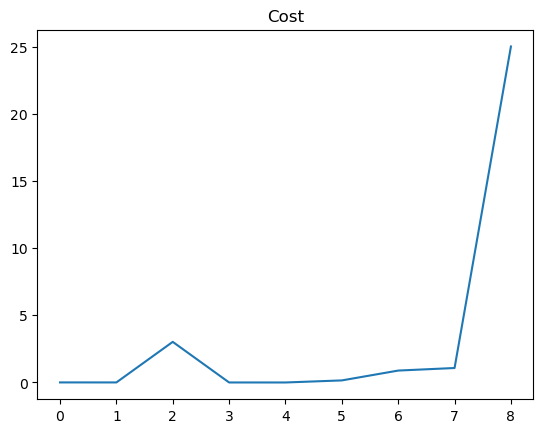

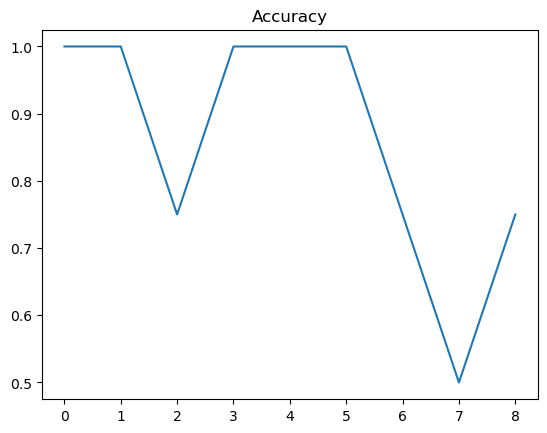

In [99]:
plt.plot(test_cost_list)
plt.title('Cost')
plt.show()
plt.plot(test_acc_list)
plt.title('Accuracy')
plt.show()